In [63]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [64]:
data = pd.read_csv("data/advertising.csv")

In [65]:
data = data.dropna()

In [66]:
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [67]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [68]:
X = data[["TV", "Radio", "Newspaper"]].values

X[:3]

array([[230.1,  37.8,  69.2],
       [ 44.5,  39.3,  45.1],
       [ 17.2,  45.9,  69.3]])

In [69]:
y = data[["Sales"]].values

y[:3]

array([[22.1],
       [10.4],
       [ 9.3]])

In [70]:
means = X.mean(axis=0)

means[:3]

array([147.0425,  23.264 ,  30.554 ])

In [71]:
stds = X.std(axis=0)

stds[:3]

array([85.63933176, 14.80964564, 21.72410606])

In [72]:
X = (X - means) / stds

X[:3]

array([[ 0.96985227,  0.98152247,  1.77894547],
       [-1.19737623,  1.08280781,  0.66957876],
       [-1.51615499,  1.52846331,  1.78354865]])

In [73]:
X = np.c_[np.ones(X.shape[0]), X]

X[:3]

array([[ 1.        ,  0.96985227,  0.98152247,  1.77894547],
       [ 1.        , -1.19737623,  1.08280781,  0.66957876],
       [ 1.        , -1.51615499,  1.52846331,  1.78354865]])

In [74]:
def mse(y: np.ndarray, y_pred: np.ndarray) -> float:
    return np.square(np.subtract(np.array(y), np.array(y_pred))).mean()

mse([1, 2, 3, 4], [1, 2, 3, 5])

0.25

In [75]:
def linear_prediction(X: np.ndarray, w: np.ndarray) -> np.ndarray:
    return np.dot(X, w)

linear_prediction(X[:3], np.zeros(4))

array([0., 0., 0.])

In [76]:
def stochastic_gradient_step(X, y, w, train_ind, eta=0.01) -> np.ndarray:  
    grad0 = w[0] - ((2 * eta) / y.shape[0]) * X[train_ind][0] * (np.dot(w, X[train_ind]) - y[train_ind])
    grad1 = w[1] - ((2 * eta) / y.shape[0]) * X[train_ind][1] * (np.dot(w, X[train_ind]) - y[train_ind])
    grad2 = w[2] - ((2 * eta) / y.shape[0]) * X[train_ind][2] * (np.dot(w, X[train_ind]) - y[train_ind])
    grad3 = w[3] - ((2 * eta) / y.shape[0]) * X[train_ind][3] * (np.dot(w, X[train_ind]) - y[train_ind])
    
    return  np.array([grad0[0], grad1[0], grad2[0], grad3[0]])

stochastic_gradient_step(X[:3], y[:3], np.zeros(4), 0)

array([0.14733333, 0.14289157, 0.14461098, 0.26209797])

In [96]:
def stochastic_gradient_descent(X, y, w_init, eta=0.01, max_iter=10000, seed=42):
    np.random.seed(seed)

    w = w_init
    errors = []

    iter_num = 0
    while iter_num < max_iter:
        random_ind = np.random.randint(X.shape[0])

        w = stochastic_gradient_step(X, y, w, random_ind)
        
        errors.append(mse(y, linear_prediction(X, w)))

        iter_num += 1

    return w, errors

In [97]:
%%time
stoch_grad_desc_weights, stoch_errors_by_iter = stochastic_gradient_descent(X, y, np.array([0, 0, 0, 0]), max_iter=100000)

CPU times: user 14.3 s, sys: 26 µs, total: 14.3 s
Wall time: 14.3 s


Text(0, 0.5, 'MSE')

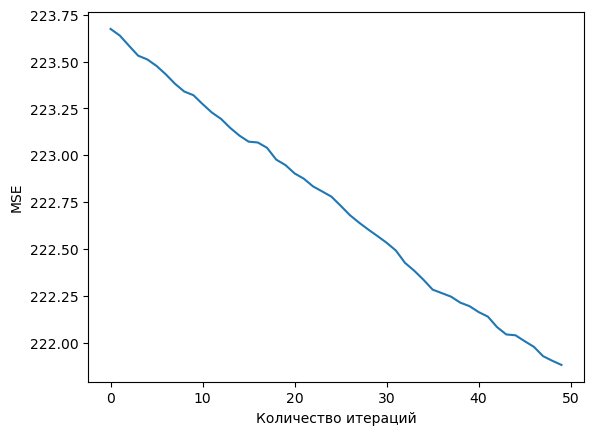

In [98]:
plt.plot(range(50), stoch_errors_by_iter[:50])
plt.xlabel("Количество итераций")
plt.ylabel("MSE")

Text(0, 0.5, 'MSE')

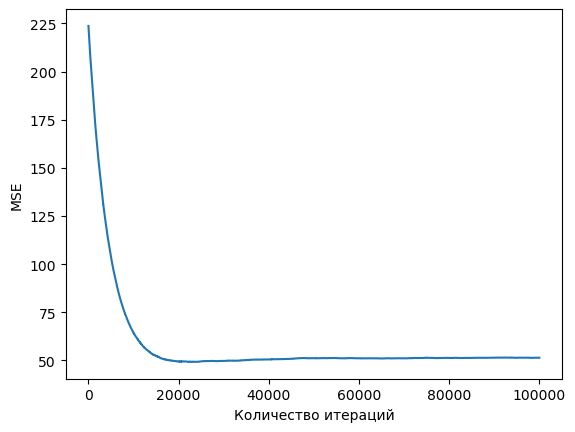

In [99]:
plt.plot(range(len(stoch_errors_by_iter)), stoch_errors_by_iter)
plt.xlabel("Количество итераций")
plt.ylabel("MSE")

In [100]:
stoch_grad_desc_weights

array([14.01961682,  3.94909052,  2.76783147, -0.04537642])

In [101]:
stoch_errors_by_iter[-1]

51.43293228981129